https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [5]:
df = pd.get_dummies(df)
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    int64  
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

### 3. Divide en train y test

In [7]:
X = df.drop("actual", axis=1)
y = df["actual"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [9]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [71]:
def mae(x, y, model):
    lista = []
    y_pred = model.predict(x)
    print(list(y))
    print(y_pred)
    resta = y_pred - y
    for num in resta:
        if num < 0:
            num = num * (-1)
            lista.append(num)
        else:
            lista.append(num)
    
    mae = sum(lista)/len(lista)
    return "mae:", mae


In [47]:
mae(X_train, y_train, dtr)

[74, 57, 69, 50, 56, 67, 48, 80, 48, 49, 57, 77, 81, 67, 66, 57, 45, 71, 59, 76, 57, 54, 54, 52, 82, 35, 41, 48, 80, 68, 39, 85, 79, 52, 76, 53, 41, 48, 61, 77, 68, 46, 43, 71, 62, 67, 74, 57, 52, 59, 54, 47, 55, 66, 54, 40, 45, 67, 70, 45, 65, 67, 57, 61, 72, 76, 55, 67, 73, 57, 54, 75, 66, 65, 60, 59, 58, 52, 51, 51, 64, 68, 55, 62, 44, 63, 64, 40, 68, 71, 76, 65, 71, 57, 35, 75, 71, 75, 77, 57, 49, 90, 68, 59, 87, 68, 68, 40, 46, 64, 52, 71, 79, 68, 86, 72, 41, 64, 58, 67, 74, 59, 73, 55, 75, 63, 58, 48, 51, 65, 81, 80, 73, 60, 76, 69, 56, 46, 55, 57, 64, 74, 49, 65, 55, 53, 52, 75, 66, 68, 65, 83, 60, 76, 62, 73, 79, 77, 55, 63, 60, 85, 63, 57, 42, 66, 65, 44, 45, 53, 59, 52, 59, 79, 77, 55, 72, 80, 68, 68, 58, 49, 72, 64, 71, 67, 51, 51, 71, 52, 56, 61, 68, 63, 60, 63, 59, 60, 64, 81, 50, 54, 48, 67, 56, 49, 60, 72, 50, 77, 88, 75, 46, 76, 40, 50, 60, 75, 66, 55, 73, 77, 61, 89, 61, 44, 51, 54, 83, 49, 64, 60, 59, 68, 71, 49, 71, 60, 65, 42, 71, 55, 39, 68, 60, 51, 78, 74, 57, 71,

('mae:', 0.0)

In [48]:
mae(X_test, y_test, dtr)

[66, 61, 52, 66, 70, 82, 85, 84, 65, 92, 61, 85, 44, 65, 69, 62, 64, 56, 53, 79, 63, 57, 67, 62, 59, 56, 65, 52, 66, 76, 64, 61, 48, 81, 77, 57, 58, 47, 68, 51, 77, 56, 73, 51, 59, 87, 58, 81, 58, 42, 49, 40, 65, 64, 70, 65, 53, 57, 53, 60, 67, 49, 53, 69, 55, 68, 76, 69, 78, 36]
[79. 61. 53. 68. 72. 63. 73. 73. 68. 67. 61. 67. 41. 68. 68. 55. 59. 57.
 57. 79. 63. 55. 71. 58. 63. 49. 71. 50. 60. 77. 66. 68. 55. 79. 73. 60.
 54. 57. 67. 45. 77. 60. 81. 41. 58. 85. 54. 87. 51. 44. 45. 42. 64. 66.
 75. 60. 55. 64. 51. 60. 60. 49. 57. 71. 63. 57. 76. 67. 80. 41.]


('mae:', 4.671428571428572)

### 6. Calcula su MAPE
Sin usar sklearn

In [61]:
def mape(x, y):
    lista = []
    y_pred = dtr.predict(x)
    print(list(y))
    print(y_pred)
    resta = y_pred - y
    for num in resta:
        if num < 0:
            num = num * (-1)
            lista.append(num)
        else:
            lista.append(num)
    
    mape = sum(lista)/sum(y) * 100
    print("mape:", round(mape,3), "%")

In [62]:
mape(X_test, y_test)

[66, 61, 52, 66, 70, 82, 85, 84, 65, 92, 61, 85, 44, 65, 69, 62, 64, 56, 53, 79, 63, 57, 67, 62, 59, 56, 65, 52, 66, 76, 64, 61, 48, 81, 77, 57, 58, 47, 68, 51, 77, 56, 73, 51, 59, 87, 58, 81, 58, 42, 49, 40, 65, 64, 70, 65, 53, 57, 53, 60, 67, 49, 53, 69, 55, 68, 76, 69, 78, 36]
[79. 61. 53. 68. 72. 63. 73. 73. 68. 67. 61. 67. 41. 68. 68. 55. 59. 57.
 57. 79. 63. 55. 71. 58. 63. 49. 71. 50. 60. 77. 66. 68. 55. 79. 73. 60.
 54. 57. 67. 45. 77. 60. 81. 41. 58. 85. 54. 87. 51. 44. 45. 42. 64. 66.
 75. 60. 55. 64. 51. 60. 60. 49. 57. 71. 63. 57. 76. 67. 80. 41.]
mape: 7.375 %


### 7. Representa el árbol de decision

In [64]:
import matplotlib.pyplot as plt

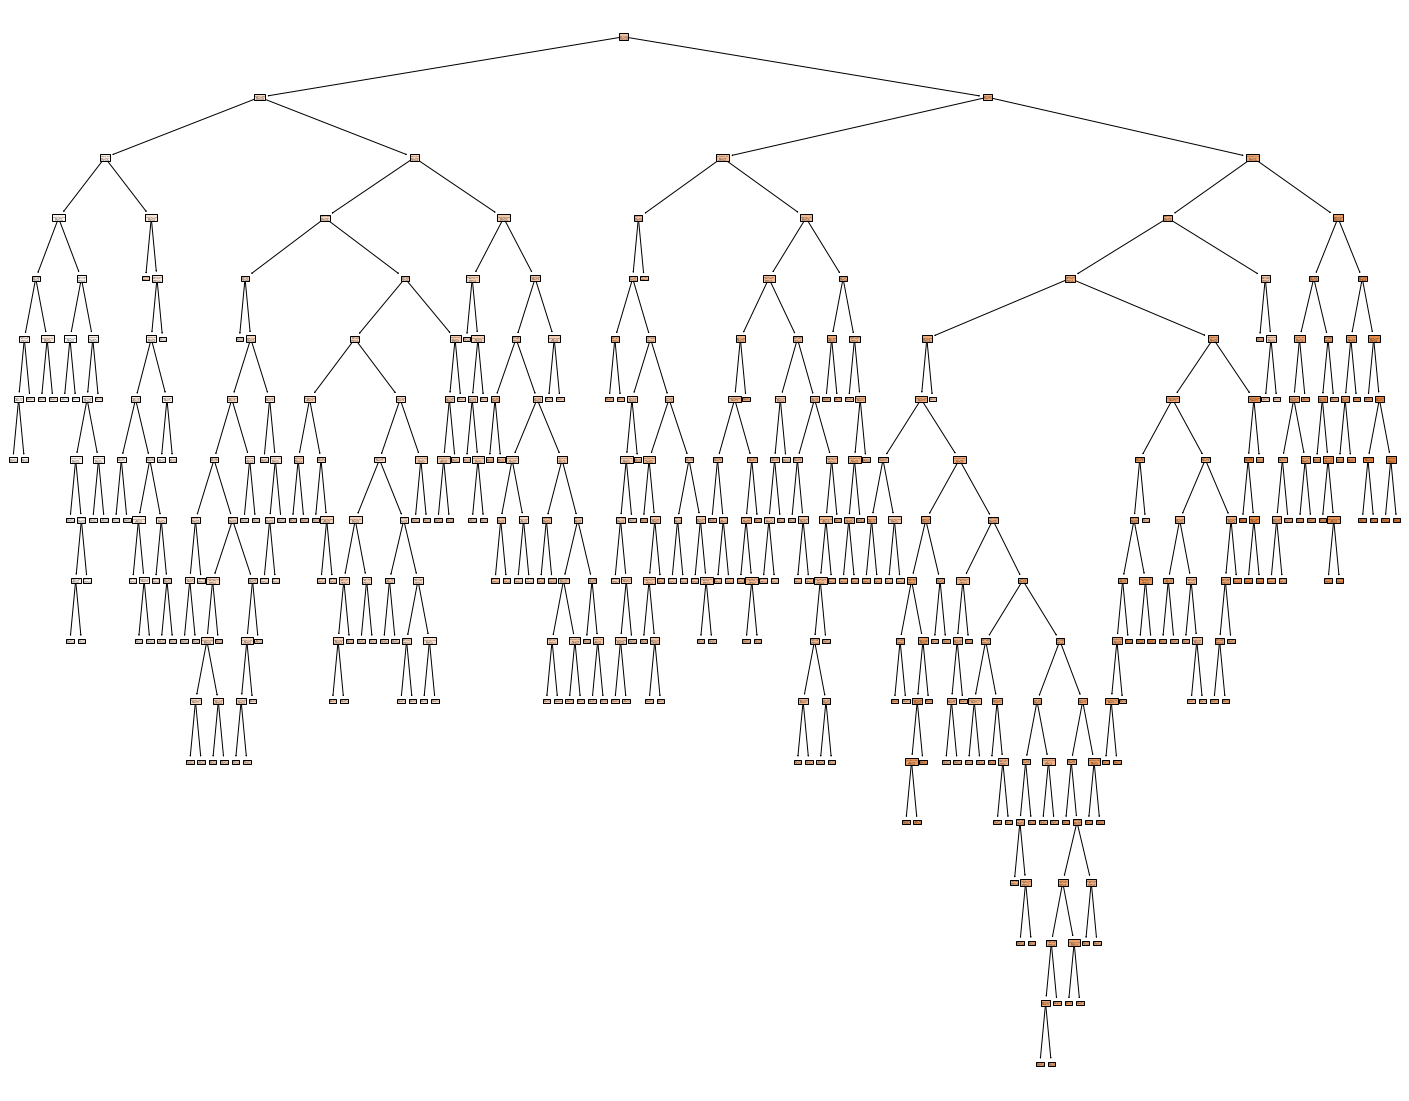

In [65]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [66]:
dtree = DecisionTreeRegressor(max_depth=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [72]:
mae(X_test, y_test, dtree)

[66, 61, 52, 66, 70, 82, 85, 84, 65, 92, 61, 85, 44, 65, 69, 62, 64, 56, 53, 79, 63, 57, 67, 62, 59, 56, 65, 52, 66, 76, 64, 61, 48, 81, 77, 57, 58, 47, 68, 51, 77, 56, 73, 51, 59, 87, 58, 81, 58, 42, 49, 40, 65, 64, 70, 65, 53, 57, 53, 60, 67, 49, 53, 69, 55, 68, 76, 69, 78, 36]
[72.61842105 61.37037037 52.44444444 66.08333333 66.08333333 72.61842105
 72.61842105 72.61842105 61.37037037 72.61842105 61.37037037 72.61842105
 41.05882353 61.37037037 72.61842105 58.13333333 61.37037037 52.44444444
 58.13333333 72.61842105 66.08333333 58.13333333 66.08333333 61.37037037
 58.13333333 52.44444444 66.08333333 46.         58.13333333 78.7826087
 72.61842105 66.08333333 58.13333333 78.7826087  78.7826087  61.37037037
 52.44444444 52.44444444 72.61842105 46.         72.61842105 52.44444444
 72.61842105 41.05882353 61.37037037 72.61842105 52.44444444 78.7826087
 52.44444444 41.05882353 46.         41.05882353 66.08333333 66.08333333
 72.61842105 61.37037037 58.13333333 58.13333333 52.44444444 58.

('mae:', 4.4244444942991175)

In [68]:
y_prdict = dtree.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_prdict)

4.424444494299118

### 10. Vuelve a representar su árbol

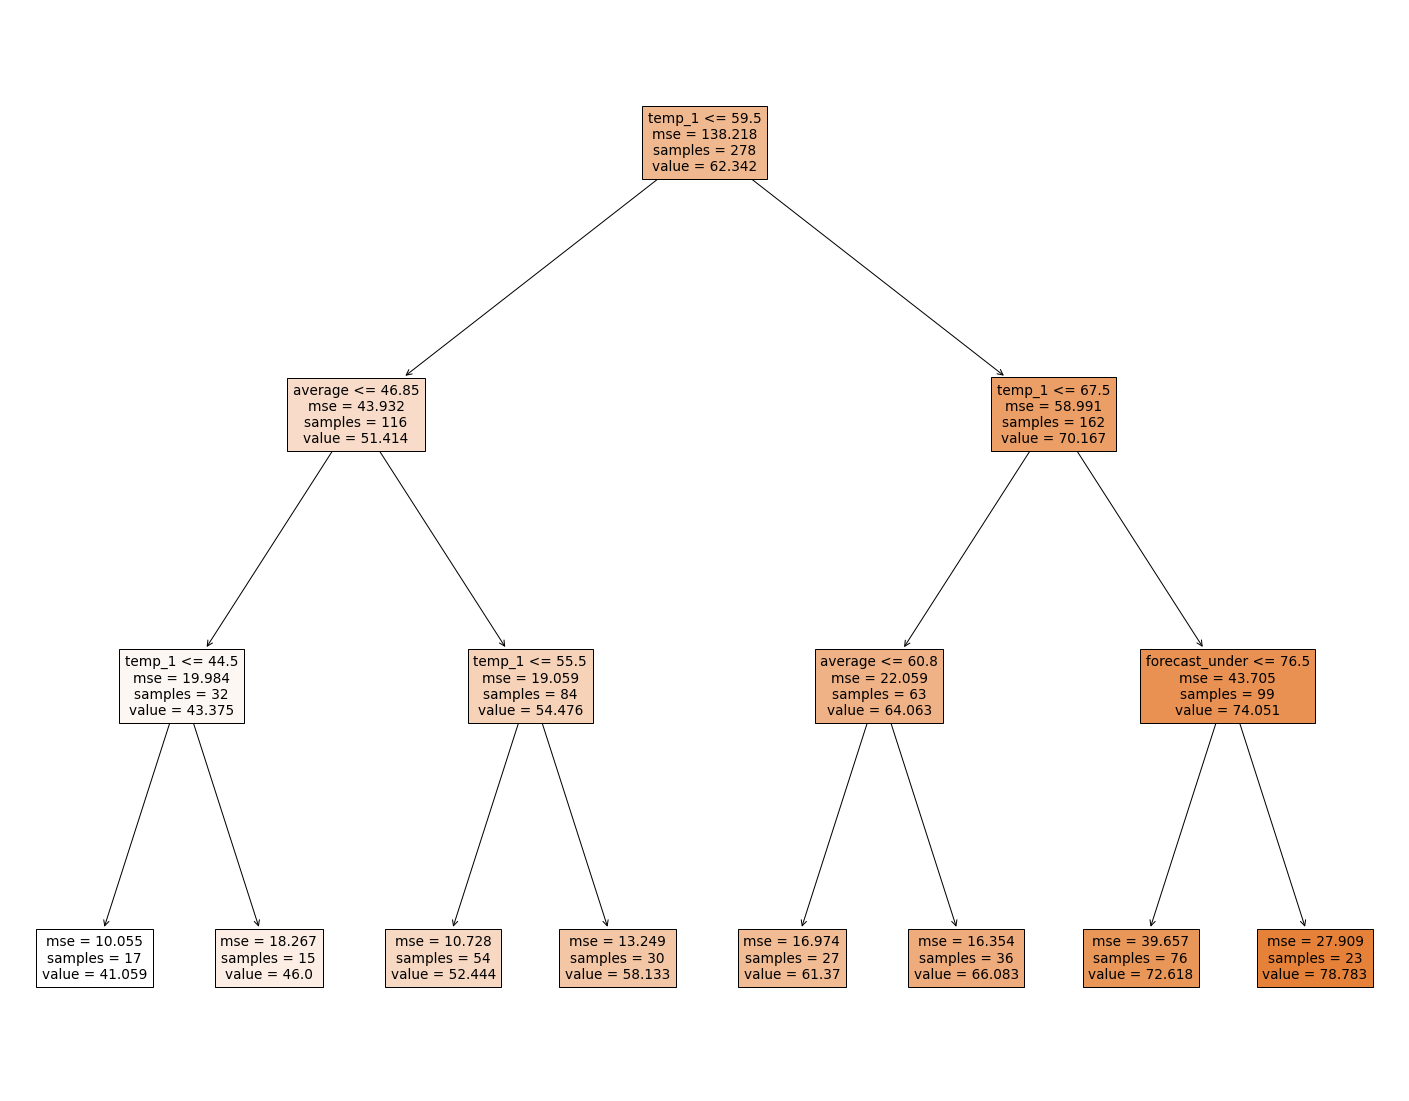

In [74]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [75]:
importances = dtree.feature_importances_

In [79]:
dictionary = dict(zip(df.columns, importances))

In [90]:
dictionary

{'year': 0.0,
 'month': 0.0,
 'day': 0.0,
 'temp_2': 0.0,
 'temp_1': 0.880207512803485,
 'average': 0.09902151902341232,
 'actual': 0.0,
 'forecast_noaa': 0.0,
 'forecast_acc': 0.020770968173102675,
 'forecast_under': 0.0,
 'friend': 0.0,
 'week_Fri': 0.0,
 'week_Mon': 0.0,
 'week_Sat': 0.0,
 'week_Sun': 0.0,
 'week_Thurs': 0.0,
 'week_Tues': 0.0}